In [1]:
import midi
import operator
import numpy as np
import matplotlib.pyplot as plt
from track_util import *
from util import *

In [2]:
def count_other_event(track):
    count = 0
    for event in track:
        if not isinstance(event, midi.NoteOnEvent):
            count = count + 1
        else:
            return count

In [3]:
midiname = "../track/I_Heard_It_Through_the_Grapevine_0_Acoustic_Grand.mid"
pattern = read_midifile(midiname)
matrix = track_to_matrix(pattern[1])
matrix = sort_matrix(matrix)

In [4]:
start = count_other_event(pattern[1])

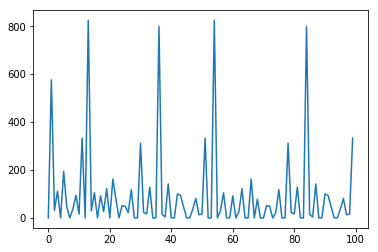

In [5]:
t = matrix[:,0]
t = t[1:] - t[:-1]
# t = t[:200]
plt.plot(range(len(t))[:100],t[:100])

In [6]:
m = np.max(t) / 3

In [7]:
peak = []
for idx, value in enumerate(t):
    if value > m:
        peak.append(idx)

In [8]:
t = matrix[:,0]
delta = []
for i in range(len(peak)-1):
    delta.append(t[peak[i+1]]-t[peak[i]])

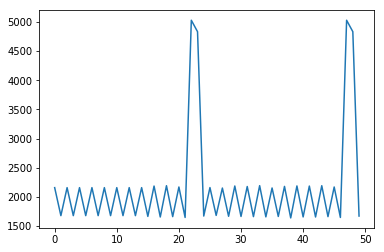

In [9]:
plt.plot(range(len(delta))[:50],delta[:50])

In [11]:
peak[1]

36

In [12]:
new = midi.Pattern(resolution=pattern.resolution,format=pattern.format)
new.append(pattern[0])
new.append(pattern[1][:start+36])
midi.write_midifile("../test.mid",new)